## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential 
from keras import Input 
from keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import SGD

In [74]:
df1 = pd.read_csv('a1_va3.csv')
df2 = pd.read_csv('a1_raw.csv')
df3 = pd.read_csv('a2_va3.csv')
df4 = pd.read_csv('a2_raw.csv')
df5 = pd.read_csv('a3_va3.csv')
df6 = pd.read_csv('a3_raw.csv')
df7 = pd.read_csv('b1_va3.csv')
df8 = pd.read_csv('b1_raw.csv')
df9 = pd.read_csv('b3_va3.csv')
df10 = pd.read_csv('b3_raw.csv')
df11 = pd.read_csv('c1_va3.csv')
df12 = pd.read_csv('c1_raw.csv')
df13 = pd.read_csv('c3_va3.csv')
df14 = pd.read_csv('c3_raw.csv')

## Data Preprocessing

In [75]:
df2 = df2.iloc[4:].reset_index()
df4 = df4.iloc[4:].reset_index()
df6 = df6.iloc[4:].reset_index()
df8 = df8.iloc[4:].reset_index()
df10 = df10.iloc[4:].reset_index()
df12 = df12.iloc[4:].reset_index()
df14 = df14.iloc[4:].reset_index()

In [76]:
df1df2 = pd.concat([df1,df2], axis="columns")
df3df4 = pd.concat([df3, df4], axis="columns")
df5df6 = pd.concat([df5, df6], axis="columns")
df7df8 = pd.concat([df7, df8], axis="columns")
df9df10 = pd.concat([df9, df10], axis="columns")
df11df12 = pd.concat([df11, df12], axis="columns")
df13df14 = pd.concat([df13, df14], axis="columns")

In [77]:
df = pd.concat([df1df2, df3df4, df5df6, df7df8, df9df10, df11df12, df13df14])
df.shape

(9873, 54)

In [78]:
df = df.drop(['Phase', 'index', 'timestamp'], axis=1)

In [79]:
mapping_dict_p = {
    'D': 0,
    'P': 1,
    'S': 2,
    'H': 3,
    'R': 4
}
df['phase'] = df['phase'].map(mapping_dict_p)

## Data Visualization

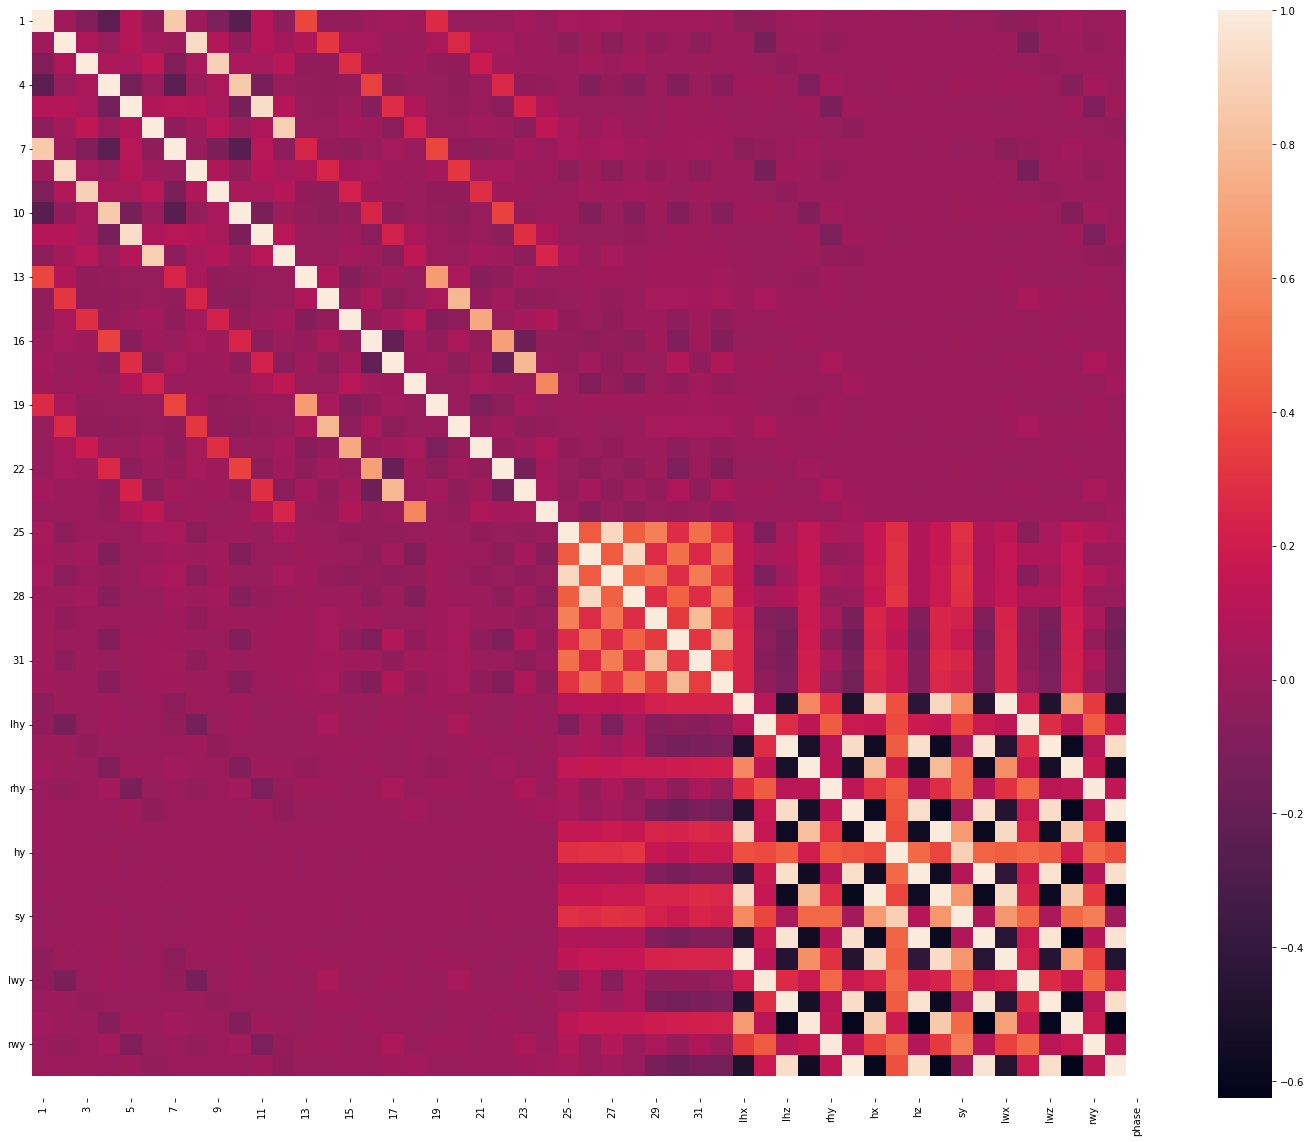

In [88]:
heatmap = sns.heatmap(df.corr())
plt.gcf().set_size_inches(25, 20)
plt.savefig('correlation_heatmap.png')
plt.show()

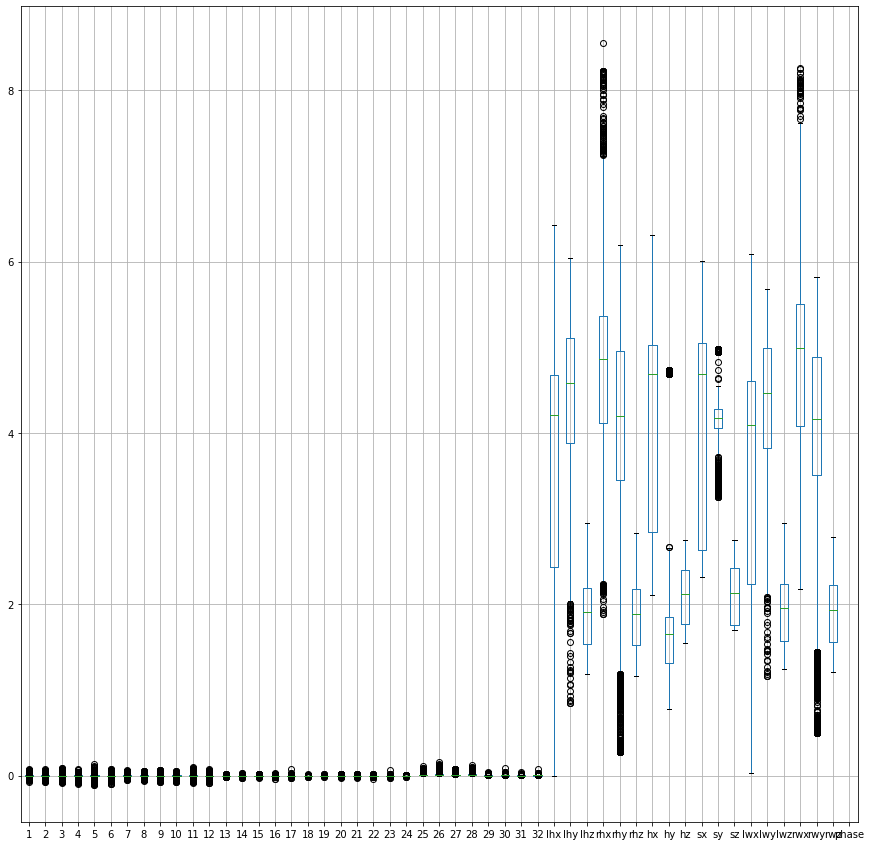

In [91]:
df.boxplot(figsize =(15,15))
plt.savefig('boxplot.png')
plt.show()

In [92]:
sns.pairplot(df)

ValueError: cannot reindex from a duplicate axis

## Data preparation for modeling

In [93]:
y = df.iloc[: , -1]
X = df.drop(['phase'], axis=1)

In [94]:
y = to_categorical(y)

NameError: name 'to_categorical' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Model implementation

### Recurrent Neural Networks

Model 1: 'Vanilla' RNN with Adam

In [ ]:
opt = SGD(lr=0.01, momentum=0.9)

In [ ]:
# Create RNN model
model1 = Sequential()
model1.add(SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(Dropout(0.2))
model1.add(Dense(units=5, activation='softmax'))

# Compile and fit model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.fit(X_train, y_train, epochs=100)

# Evaluate model on test data
_, train_acc = model1.evaluate(X_train, y_train, verbose=0)
_, test_acc = model1.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Model 1: 'Vanilla' RNN with SGD

In [ ]:
# Create RNN model
model = Sequential()
model.add(SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=5, activation='softmax'))

# Compile and fit model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

# Evaluate model on test data
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Model 2: LSTM RNN with Adam

In [ ]:
model2 = Sequential()
model2.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(64))
model2.add(Dropout(0.2))
model2.add(Dense(units=5, activation='softmax'))

# Compile and fit model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate model on test data
_, train_acc = model2.evaluate(X_train, y_train, verbose=0)
_, test_acc = model2.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Model 2: LSTM RNN with SGD

In [ ]:
model3 = Sequential()
model3.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model3.add(Dropout(0.2))
model3.add(LSTM(64))
model3.add(Dropout(0.2))
model3.add(Dense(units=5, activation='softmax'))

# Compile and fit model
model3.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate model on test data
_, train_acc = model3.evaluate(X_train, y_train, verbose=0)
_, test_acc = model3.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Model 3: GRU RNN with Adam

In [ ]:
model4 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
    layers.GRU(64, return_sequences=True),
    layers.GRU(32),
    layers.Dense(16, activation="relu"),
    layers.Dense(5, activation="softmax")
])

# Compile and fit model
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate model on test data
_, train_acc = model4.evaluate(X_train, y_train, verbose=0)
_, test_acc = model4.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Model 3: GRU RNN with SGD

In [ ]:
model5 = keras.Sequential([
    layers.Input(shape=(X_train.shape[1], X_train.shape[2])),
    layers.GRU(64, return_sequences=True),
    layers.GRU(32),
    layers.Dense(16, activation="relu"),
    layers.Dense(5, activation="softmax")
])

# Compile and fit model
model5.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model5.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate model on test data
_, train_acc = model5.evaluate(X_train, y_train, verbose=0)
_, test_acc = model5.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Artificial Neural Network 

In [ ]:
import numpy as np 
import pandas as pd 
import glob 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA

In [ ]:
df=pd.read_csv('NNDL_finaldataset.csv')
df.head()
X=df.drop(['timestamp','phase'],axis=1)
X=StandardScaler().fit_transform(X)
le = LabelEncoder()
df['phase'] = le.fit_transform(df['phase'])
y=df['phase']
y=to_categorical(y)



In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
# x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,train_size=0.1,random_state=0)

In [ ]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
x_test=pca.fit_transform(x_test)
x_train=pca.fit_transform(x_train)
# x_val=pca.fit_transform(x_val)

In [ ]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)


In [ ]:
from keras.optimizers import SGD
optimi=SGD(learning_rate=0.01,momentum=0.9)

ANN with Adam 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras import regularizers

# define the model
model11 = Sequential()
model11.add(Dense(512, input_dim=5, activation='relu',kernel_regularizer=regularizers.L2(0.03)))
model11.add(Dropout(0.3))
model11.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.03)))
model11.add(Dropout(0.1))
model11.add(Dense(128, activation='relu'))
model11.add(Dropout(0.1))
model11.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model11.add(Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model11.add(Dense(64, activation='relu'))
model11.add(Dropout(0.1))
model11.add(Dense(64, activation='relu'))
model11.add(Dropout(0.1))
model11.add(Dense(32, activation='relu'))
model11.add(Dropout(0.2))
model11.add(Dense(16, activation='relu'))
model11.add(Dense(5, activation='softmax'))
# compile the model
# model.compile(loss='categorical_crossentropy', optimizer=optimi, metrics=['accuracy'])

model11.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# print the model summary
model11.summary()


In [ ]:
model11.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))


In [ ]:
_,test_acc=model11.evaluate(x_test,y_test)
_,train_acc=model11.evaluate(x_train,y_train)
print('Training Accuracy: % .2f' % (train_acc*100))
print('Test Accuracy: % .2f' % (test_acc*100))

ANN with Adam Optimizer 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras import regularizers

# define the model
model22 = Sequential()
model22.add(Dense(512, input_dim=5, activation='relu',kernel_regularizer=regularizers.L2(0.01)))
model22.add(Dropout(0.3))
model22.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model22.add(Dropout(0.1))
model22.add(Dense(128, activation='relu'))
model22.add(Dropout(0.1))
model22.add(Dense(64, activation='relu'))
model22.add(Dropout(0.1))
model22.add(Dense(64, activation='relu'))
model22.add(Dense(16, activation='relu'))
model22.add(Dense(5, activation='softmax'))
# compile the model
model22.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.08), metrics=['accuracy'])

# print the model summary
model22.summary()


In [ ]:
model22.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))


In [ ]:
_,test_acc=model22.evaluate(x_test,y_test)
_,train_acc=model22.evaluate(x_train,y_train)
print('Training Accuracy: % .2f' % (train_acc*100))
print('Test Accuracy: % .2f' % (test_acc*100))

ANN with SGD

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from keras import regularizers

# define the model
model33 = Sequential()
model33.add(Dense(512, input_dim=5, activation='relu',kernel_regularizer=regularizers.L2(0.03)))
model33.add(Dropout(0.3))
model33.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.03)))
model33.add(Dropout(0.1))
model33.add(Dense(128, activation='relu'))
model33.add(Dropout(0.1))
model33.add(Dense(64, activation='relu'))
model33.add(Dropout(0.1))
model33.add(Dense(32, activation='relu'))
model33.add(Dense(16, activation='relu'))
model33.add(Dense(5, activation='softmax'))
# compile the model
model33.compile(loss='categorical_crossentropy', optimizer=optimi, metrics=['accuracy'])

# print the model summary
model33.summary()


In [ ]:
model33.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))


In [ ]:
_,test_acc=model33.evaluate(x_test,y_test)
_,train_acc=model33.evaluate(x_train,y_train)
print('Training Accuracy: % .2f' % (train_acc*100))
print('Test Accuracy: % .2f' % (test_acc*100))